<a href="https://colab.research.google.com/github/bbbbbin2/2025_BigData/blob/main/notebook/%ED%99%94%EB%AC%BC%EC%B0%A8_%EA%B5%90%ED%86%B5%EC%82%AC%EA%B3%A0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# 단계 1: 폰트 설치
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [2]:
import pandas as pd


# 화물차 교통사고 다발지역 데이터 로드
df_region_cargo = pd.read_csv("/content/화물차.csv", encoding='cp949')

df_region_cargo.head()

,사고다발지fid,사고다발지id,법정동코드,지점코드,시도시군구명,지점명,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,6787530,2022048,1111017400,11110001,서울특별시 종로구1,서울특별시 종로구 창신동(역전우동&빽다방 부근),4,8,0,4,4,0,127.011730,37.571842,"{""type"":""Polygon"",""coordinates"":[[[127.0126280..."
1,6787719,2022048,1114016500,11140001,서울특별시 중구1,서울특별시 중구 황학동(성동고교교차로 부근),4,5,0,4,1,0,127.022869,37.565398,"{""type"":""Polygon"",""coordinates"":[[[127.0237668..."
2,6787759,2022048,1114016200,11140002,서울특별시 중구2,서울특별시 중구 신당동(맥스타일 부근),4,5,0,4,0,1,127.010616,37.568953,"{""type"":""Polygon"",""coordinates"":[[[127.0115145..."
3,6787796,2022048,1114016500,11140003,서울특별시 중구3,서울특별시 중구 황학동(동대문중앙교회앞 부근),4,5,0,4,0,1,127.020128,37.568992,"{""type"":""Polygon"",""coordinates"":[[[127.0210262..."
4,6787642,2022048,1114016200,11140004,서울특별시 중구4,서울특별시 중구 신당동(신당역사거리 부근),4,4,0,4,0,0,127.016981,37.565374,"{""type"":""Polygon"",""coordinates"":[[[127.0178789..."


In [3]:
import pandas as pd

# 엑셀 파일 로드 함수
def load_excel(path, header=0):
    return pd.read_excel(path, header=header)

# 두 줄 헤더를 단일 헤더로 정리하는 함수
def clean_two_header(df):
    df = df.copy()
    df.columns = df.iloc[0] # 첫 번째 행을 컬럼으로 설정
    df = df.iloc[1:].reset_index(drop=True) # 첫 번째 행 제거 및 인덱스 초기화
    return df

# 완전히 비어있는 행/열 제거 함수
def drop_empty(df):
    return df.dropna(how="all").dropna(axis=1, how="all")

# 숫자형 문자열을 int로 변환하는 함수
def to_int(df, cols):
    df = df.copy()
    for c in cols:
        if c in df.columns:
            # 문자열(쉼표, 하이픈 포함)을 숫자로 변환, 오류 발생 시 NaN으로 처리 후 0으로 채우고 int로 변환
            df[c] = pd.to_numeric(
                df[c].astype(str).str.replace(",", "").replace("-", "0"),
                errors='coerce'
            ).fillna(0).astype(int)
    return df

# 특정 값 (예: '합계', '알수없음')을 가진 행 제거 함수
def drop_values(df, col, values=("합계", "알수없음")):
    df = df.copy()
    for v in values:
        df = df[df[col] != v]
    return df

# 특정 컬럼 값이 일치하는 행 필터링 함수
def filter_eq(df, col, value):
    return df[df[col] == value].copy()

# 데이터프레임에서 연도 컬럼 자동 탐색 함수
def get_year_cols(df):
    return [c for c in df.columns if str(c).isdigit()]

# wide 형식 데이터를 long 형식으로 변환하는 함수
def melt_table(df, id_cols, value_cols,
               var_name="연도", value_name="값"):
    return df.melt(
        id_vars=id_cols,
        value_vars=value_cols,
        var_name=var_name,
        value_name=value_name
    )

# 지역명 통일 함수
def normalize_region(df, col):
    replace_dict = {
        "전라남도": "전남", "전라북도": "전북",
        "경상남도": "경남", "경상북도": "경북",
        "충청남도": "충남", "충청북도": "충북",
        "강원도": "강원",
        "부산광역시": "부산", "대구광역시": "대구",
        "광주광역시": "광주", "인천광역시": "인천",
        "대전광역시": "대전", "울산광역시": "울산",
        "제주특별자치도": "제주",
        "세종특별자치시": "세종",
        "서울특별시": "서울"
    }
    df = df.copy()
    df[col] = df[col].replace(replace_dict, regex=True)
    return df

# 후보 컬럼명 중 실제 데이터프레임에 존재하는 첫 번째 컬럼 반환 함수
def find_main_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    raise KeyError(f"대표 컬럼을 찾을 수 없습니다: {candidates}")

In [4]:
# df_region_cargo 데이터 전처리: 화물차 사고 다발지역 데이터 통합 및 TOP10 추출

# '지점명' 컬럼의 지역명 통일
df_region_cargo = normalize_region(df_region_cargo, "지점명")

# '지점명' 기준으로 그룹화하여 사고 관련 지표 합계 계산
df_cargo_grouped = (
    df_region_cargo
    .groupby("지점명", as_index=False)
    .agg({
        "사고건수": "sum",
        "사상자수": "sum",
        "사망자수": "sum",
        "중상자수": "sum",
        "경상자수": "sum",
        "부상신고자수": "sum",
        "경도": "mean",
        "위도": "mean"
    })
)

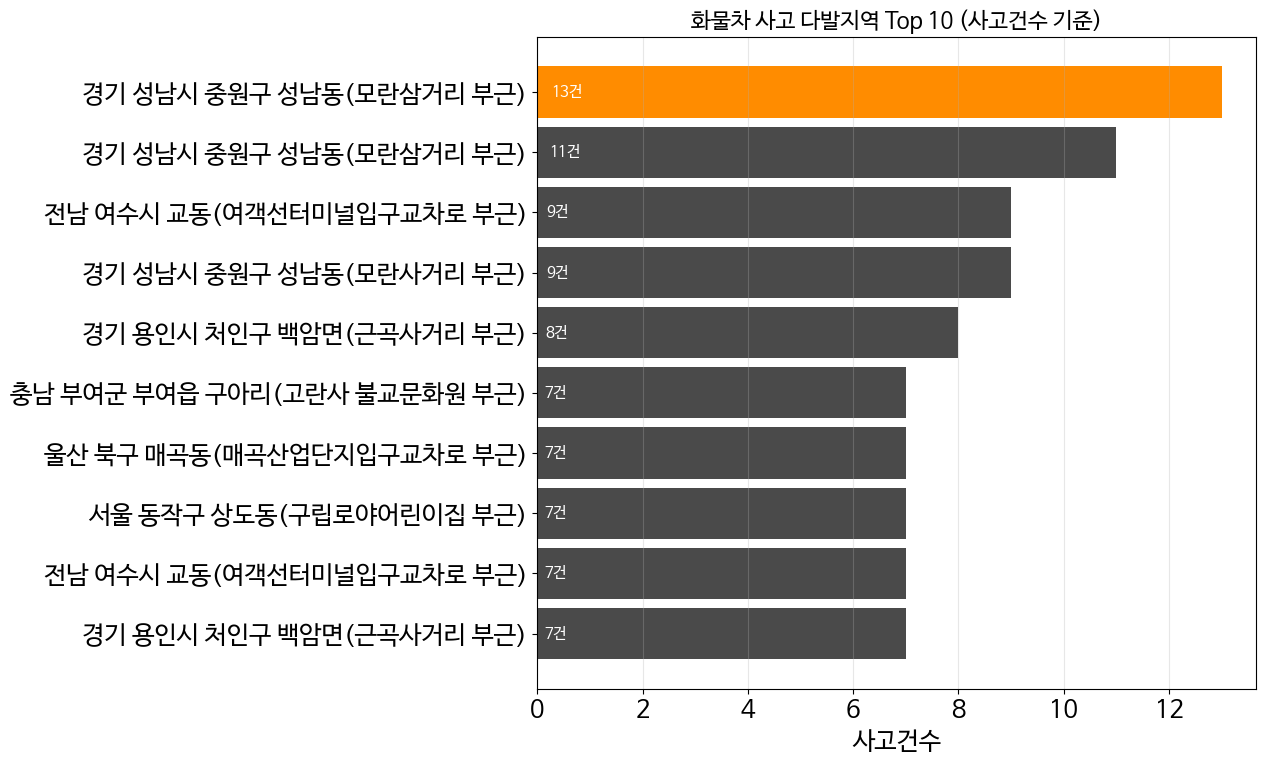

In [5]:
# 화물차 사고 다발지역 Top 10
import matplotlib.pyplot as plt
import numpy as np

df_cargo_top10 = df_region_cargo.sort_values("사고건수", ascending=False).head(10)

labels = df_cargo_top10["지점명"]
values = df_cargo_top10["사고건수"]

BASE_COLOR = "#4a4a4a"
HIGHLIGHT  = "#ff8c00"
colors = [HIGHLIGHT if v == values.max() else BASE_COLOR for v in values]

y = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(13, 8))
ax.barh(
    y,
    values,
    color=colors,
    height=0.85
)

# 막대 내부 수치
for i, v in enumerate(values):
    ax.text(
        v * 0.02,
        i,
        f"{int(v)}건",
        va="center",
        ha="left",
        color="white",
        fontsize=11,
        fontweight="bold"
    )

ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.invert_yaxis()

ax.set_title("화물차 사고 다발지역 Top 10 (사고건수 기준)", fontsize=16)
ax.set_xlabel("사고건수")
ax.grid(axis="x", alpha=0.3)

plt.tight_layout()
plt.show()


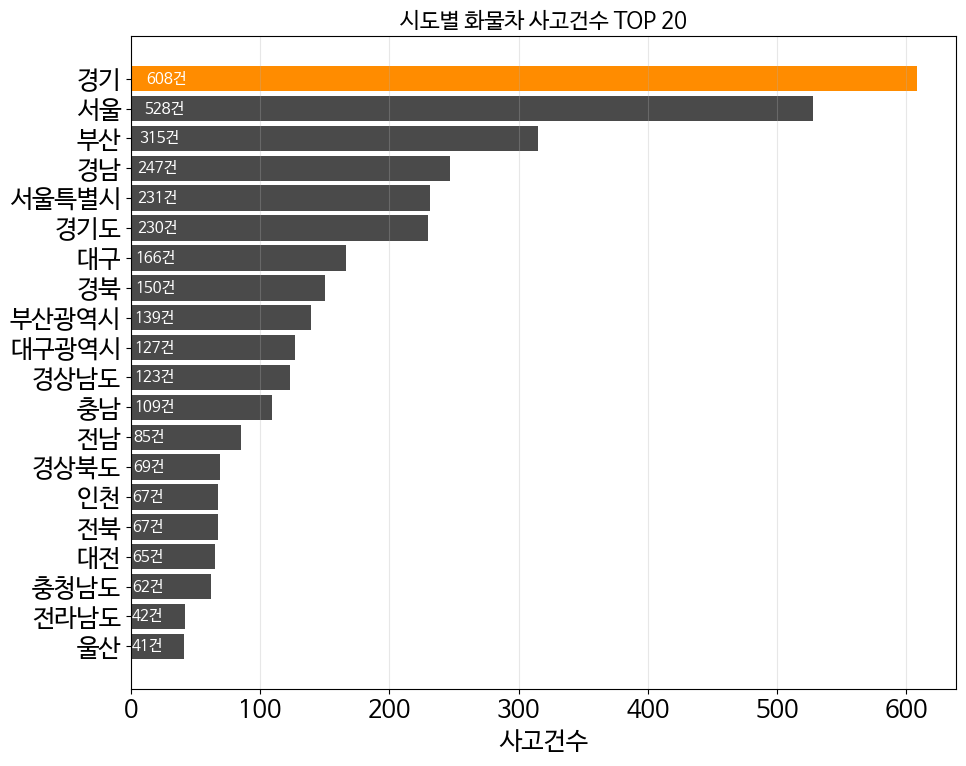

In [6]:
# 시도별 화물차 사고건수 TOP 20
import matplotlib.pyplot as plt
import numpy as np

df_region_cargo = pd.read_csv("/content/화물차.csv", encoding='cp949')

# 시도만 추출
df_region_cargo["시도"] = df_region_cargo["시도시군구명"].apply(lambda x: x.split()[0])

# 시도별 사고건수 집계 + Top 20
df_sido = (df_region_cargo.groupby("시도")["사고건수"].sum().sort_values(ascending=False). head(20))

labels = df_sido.index
values = df_sido.values

# 색상 적용
BASE_COLOR = "#4a4a4a"
HIGHLIGHT  = "#ff8c00"
colors = [HIGHLIGHT if v == values.max() else BASE_COLOR for v in values]

y = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 8))

ax.barh(y, values, color=colors,height=0.85)

# 막대 내부 수치
for i, v in enumerate(values):
    ax.text(
        v * 0.02,
        i,
        f"{int(v):,}건",
        va="center",
        ha="left",
        color="white",
        fontsize=11,
        fontweight="bold"
    )

ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.invert_yaxis()

ax.set_title("시도별 화물차 사고건수 TOP 20", fontsize=16)
ax.set_xlabel("사고건수")
ax.grid(axis="x", alpha=0.3)

plt.tight_layout()
plt.show()


In [7]:
# 시도별 화물차 사고 건수 코로플레스 지도
import folium
from folium.plugins import MarkerCluster

# 지도 생성
center = [36.5, 127.8]
m = folium.Map(location=center, zoom_start=8, tiles="CartoDB positron")

# MarkerCluster 생성
marker_cluster = MarkerCluster().add_to(m)

# 사망자수에 따라 색상 결정
def get_color(deaths):
    if deaths >= 3:
        return "red"
    elif deaths == 2:
        return "orange"
    elif deaths == 1:
        return "yellow"
    return "blue"

# 원의 크기: 사고건수 기반
def get_radius(count):
    return max(5, min(count * 1.2, 40))

# 지점별 CircleMarker 추가
for _, row in df_region_cargo.iterrows():
    folium.CircleMarker(
        location=[row["위도"], row["경도"]],
        radius=get_radius(row["사고건수"]),
        color=get_color(row["사망자수"]),
        fill=True,
        fill_color=get_color(row["사망자수"]),
        fill_opacity=0.7,
        popup=folium.Popup(f"""
        <b>지점명:</b> {row['지점명']}<br>
        <b>사고건수:</b> {row['사고건수']}<br>
        <b>사망자수:</b> {row['사망자수']}<br>
        <b>중상자수:</b> {row['중상자수']}<br>
        <b>경상자수:</b> {row['경상자수']}
        """, max_width=300)
    ).add_to(marker_cluster)

m